In [1]:
# Mostrar resultados de predicción
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [ ]:
# Para probar nuevas imagenes, cargar pares de imágenes en las carpetas, deben de tener el mismo nombre y ser de tamaño 64x64
COLOR_PATH = 'color_test/'
GRAY_PATH = 'gray_test/'

def load_image_pair(): 
    gray_images = []
    color_images = []
    for img in os.listdir(GRAY_PATH): #Mismo número de imágenes en ambas carpetas
        image_gray = tf.io.read_file(os.path.join(GRAY_PATH + img)) #Cargar cada imagen
        image_color = tf.io.read_file(os.path.join(COLOR_PATH + img))
        
        gray_img_tensor_int = tf.image.decode_jpeg(image_gray, channels=1)
        color_img_tensor_int = tf.image.decode_jpeg(image_color, channels=3)
    
        gray_img_float = tf.image.convert_image_dtype(gray_img_tensor_int, tf.float32, )
        color_img_float = tf.image.convert_image_dtype(color_img_tensor_int, tf.float32)    
        
        gray_images.append(gray_img_float)
        color_images.append(color_img_float)

    return gray_images, color_images

In [ ]:

X, y = load_image_pair()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


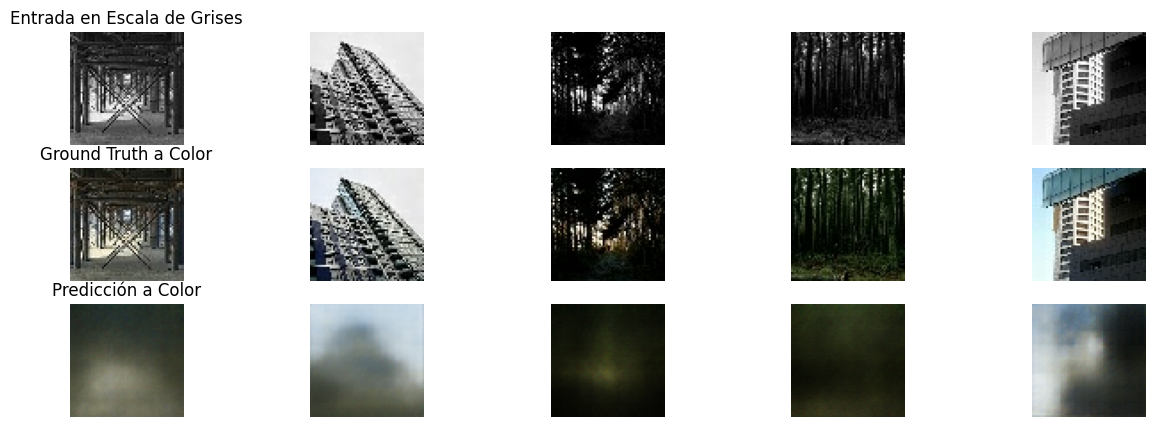

In [16]:


model = tf.keras.models.load_model('best_autoencoder_model.keras')
def display_prediction(model, X_test, y_test, num_images=5):
    preds = model.predict(np.array(X_test[:num_images]))
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Imagen en escala de grises
        plt.subplot(3, num_images, i + 1)
        plt.imshow(tf.squeeze(X_test[i]), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title('Entrada en Escala de Grises')

        # Imagen real a color
        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(y_test[i])
        plt.axis('off')
        if i == 0:
            plt.title('Ground Truth a Color')

        # Imagen predicha a color
        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(preds[i])
        plt.axis('off')
        if i == 0:
            plt.title('Predicción a Color')
    plt.show()

display_prediction(model, X_test, y_test, num_images=5)